# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

#label encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
import tensorflow as tf

#resizing and normlizing
x_train = tf.image.resize(x_train, (32, 32)) / 255.0
x_test = tf.image.resize(x_test, (32, 32)) / 255.0

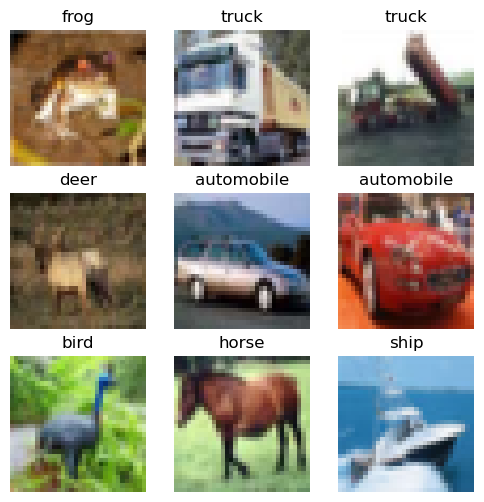

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#visulization
def show_images(images, labels, ncols=3, nrows=3):
    plt.figure(figsize=(6, 6))
    for i in range(ncols * nrows):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

show_images(x_train, y_train, ncols=3, nrows=3)

In [5]:
x_train.shape
np.unique(y_train)

array([0., 1.], dtype=float32)

In [6]:

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

x_train = tf.cast(x_train, tf.float32) / 255.0
x_test  = tf.cast(x_test,  tf.float32) / 255.0

# 3. Squeeze out any stray singleton dims (if present)
x_train = tf.squeeze(x_train)  # will remove dims of size 1
x_test  = tf.squeeze(x_test)

# 4. Force the shape to (-1,32,32,3)
x_train = tf.reshape(x_train, (-1, 32, 32, 3))
x_test  = tf.reshape(x_test,  (-1, 32, 32, 3))

# 5. Check
print("x_train shape:", x_train.shape)  # (50000, 32, 32, 3)
print("x_test  shape:", x_test.shape)   # (10000, 32, 32, 3)

x_train shape: (50000, 32, 32, 3)
x_test  shape: (10000, 32, 32, 3)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(32,32,3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same'), #32 The number of output filters (channels) in the convolution.
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = 'same'),

        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same'),

        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding = 'same'),

        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),

        layers.Dropout(0.5),
        
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                  

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

model_1 = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1, validation_data=(x_test, y_test), verbose=2)

Epoch 1/2
98/98 - 61s - loss: 1.7213 - accuracy: 0.3670 - val_loss: 1.6124 - val_accuracy: 0.4098 - 61s/epoch - 619ms/step
Epoch 2/2
98/98 - 52s - loss: 1.7022 - accuracy: 0.3763 - val_loss: 1.6350 - val_accuracy: 0.4022 - 52s/epoch - 528ms/step


*   Plot the cross entropy loss curve and the accuracy curve

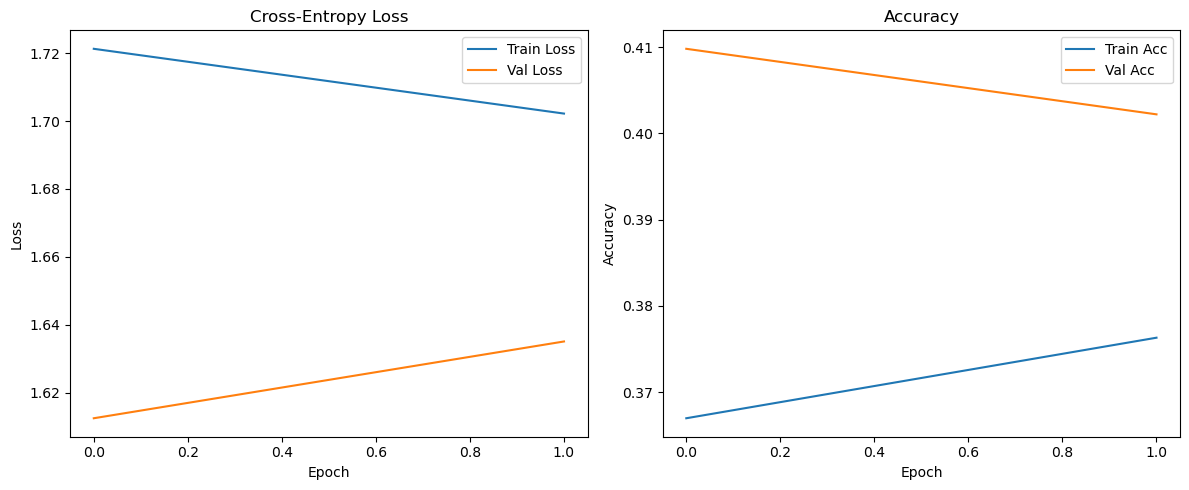

In [24]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(model_1.history['loss'],    label='Train Loss')
plt.plot(model_1.history['val_loss'],label='Val Loss')
plt.title('Cross-Entropy Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(model_1.history['accuracy'],    label='Train Acc')
plt.plot(model_1.history['val_accuracy'],label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [25]:
from keras.backend import clear_session
clear_session()

In [37]:
# Your code here :

model_VGG = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),

    # VGG Block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_VGG.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [ ]:
# Your code here :

model_VGG.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model_2 = model_VGG.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1, validation_data=(x_test, y_test), verbose=2)

Epoch 1/2
98/98 - 14s - loss: nan - accuracy: 0.0992 - val_loss: nan - val_accuracy: 0.1000 - 14s/epoch - 145ms/step
Epoch 2/2
98/98 - 16s - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000 - 16s/epoch - 159ms/step


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

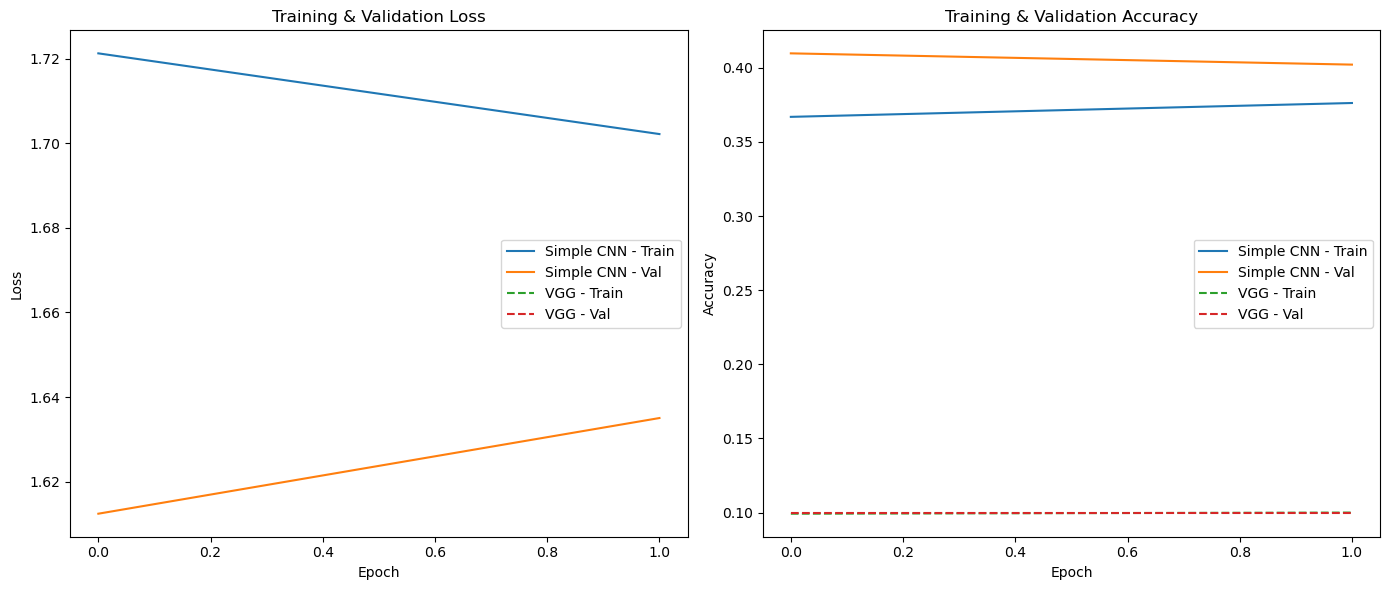

In [30]:
# Your code here :

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# --- Loss ---
plt.subplot(1, 2, 1)
plt.plot(model_1.history['loss'], label='Simple CNN - Train')
plt.plot(model_1.history['val_loss'], label='Simple CNN - Val')
plt.plot(model_2.history['loss'], label='VGG - Train', linestyle='--')
plt.plot(model_2.history['val_loss'], label='VGG - Val', linestyle='--')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# --- Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(model_1.history['accuracy'], label='Simple CNN - Train')
plt.plot(model_1.history['val_accuracy'], label='Simple CNN - Val')
plt.plot(model_2.history['accuracy'], label='VGG - Train', linestyle='--')
plt.plot(model_2.history['val_accuracy'], label='VGG - Val', linestyle='--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Comment on the observation**

The first model showed poor performance with low accuracy and high loss.
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [31]:
# Your code here :

# Predict class probabilities
y_pred_probs = model.predict(x_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Also convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test, axis=1)


313/313 [==============================] - 2s 7ms/step


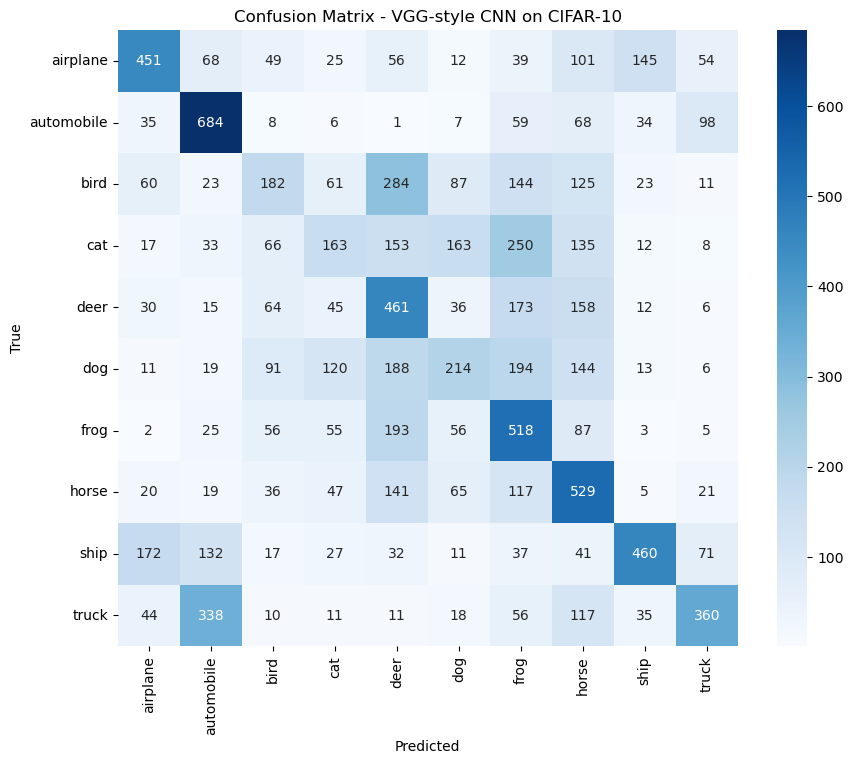

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - VGG-style CNN on CIFAR-10')
plt.show()


**Comment here :**

The model performs well on clear classes like automobile and horse but struggles with similar-looking ones like cat-dog and ship-airplane.

...

*    Print the test accuracy for the trained model.

In [33]:
# Your code here :
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 40.22%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [34]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

num_classes = 10

model_VGG2= keras.Sequential([
    keras.Input(shape=(64, 64, 3)),

    # Block 1
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Block 3
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Classification Head
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_VGG2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                 

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [39]:
# Your code here :
x_train_resized = tf.image.resize(x_train, [64, 64])
x_test_resized = tf.image.resize(x_test, [64, 64])

In [ ]:
# Your code here :

model_VGG2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
model_3 = model_VGG2.fit(x_train_resized, y_train, batch_size=512, epochs=10, validation_split=0.1, verbose=2)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions add non-linearity, allowing networks to learn complex patterns beyond linear combinations.
_

2 - Key Differences between sigmoid and softmax:

Sigmoid: Used for binary classification, outputs independent probabilities (0–1) per unit.
Softmax: Used for multi-class classification, outputs a probability distribution across classes (sums to 1).
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy: For 2-class problems, with sigmoid output, and single-label targets (0 or 1).
Categorical crossentropy: For multi-class problems, with softmax output, and one-hot encoded targets.
_
